In [1]:
import numpy as np
# import ipynb.fs
from lib.util import plot_XY_function_graph
from lib.ode import plot_approximate_vs_exact

import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Problem:

Using **rk4** method solve the system of equation

Here $y$ and $z$ are function of $x$.

$y'=y - y + 2$,<br/>
$z' = -y + z + 4x$ <br/>
with $y(0) = -1$, $z(0) = 0$ <br/>
Exact solution is,<br/>
$y = -0.5  e^{2x} + x^2 + 2x - 0.5$,<br/>
$z = -0.5  e^{2x} + x^2 - 0.5$.

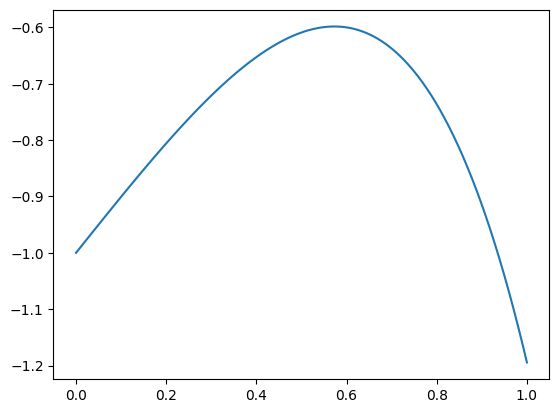

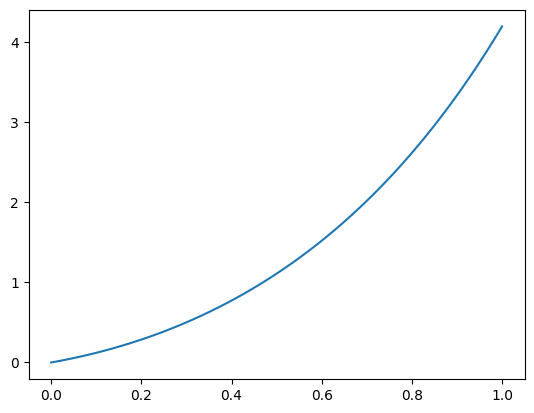

In [2]:
plot_XY_function_graph(0, 1, lambda x : -0.5*np.exp(2*x) + x**2 + 2*x - 0.5)
plot_XY_function_graph(0, 1, lambda x : 0.5*np.exp(2*x) + x**2 + - 0.5)

## **rk4_system** method:

suppose 1st order system of ODE is of the form $y'=f(x,y, z, ...) $ , $z'=f(x,y,z, ...)$ 


## First implementation

last point error = 8.342863559596125e-05
rmse = 4.244848029751906e-05


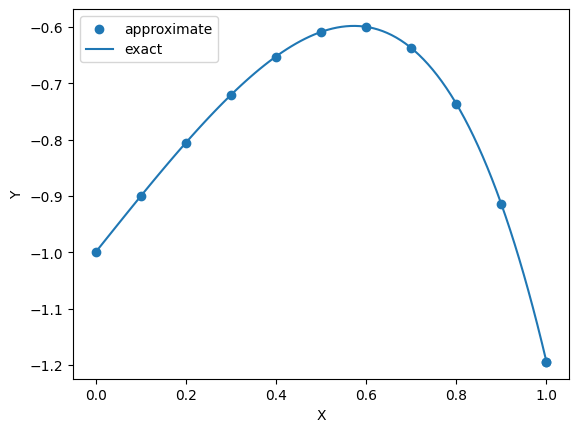

last point error = 8.342863559551716e-05
rmse = 4.244848029729883e-05


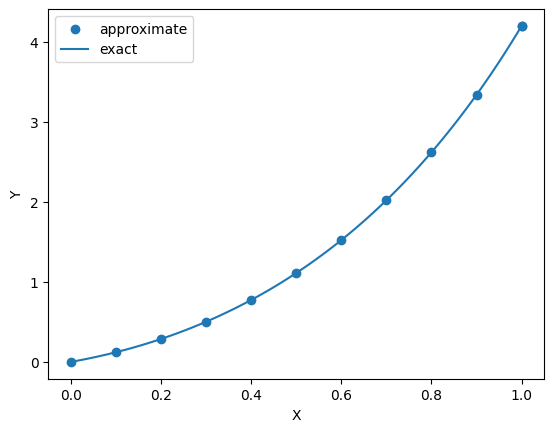

In [3]:
# in this algorithm we use h strategy

def f(t, x, y):
    return x - y + 2

def g(t, x, y):
    return -x + y + 4*t 

t0 = 0
tn = 1

x0 = -1
y0 = 0

T = np.zeros(100)
X = np.zeros(100)
Y = np.zeros(100)

T[0] = t0
X[0] = x0
Y[0] = y0

h = .1
i = 0

while T[i] + h < tn:
    k1 = h * f(T[i], X[i], Y[i])
    l1 = h * g(T[i], X[i], Y[i])
    k2 = h * f(T[i] + h/2, X[i] + k1/2, Y[i] + l1/2)
    l2 = h * g(T[i] + h/2, X[i] + k1/2, Y[i] + l1/2)
    k3 = h * f(T[i] + h/2, X[i] + k2/2, Y[i] + l2/2)
    l3 = h * g(T[i] + h/2, X[i] + k2/2, Y[i] + l2/2)
    k4 = h * f(T[i] + h, X[i] + k3, Y[i] + l3)
    l4 = h * g(T[i] + h, X[i] + k3, Y[i] + l3)
    X[i+1] = X[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    Y[i+1] = Y[i] + (l1 + 2*l2 + 2*l3 + l4)/6
    T[i+1] = T[i] + h
    i = i + 1

h = tn - T[i]
T[i+1] = T[i] + h

k1 = h * f(T[i], X[i], Y[i])
l1 = h * g(T[i], X[i], Y[i])
k2 = h * f(T[i] + h/2, X[i] + k1/2, Y[i] + l1/2)
l2 = h * g(T[i] + h/2, X[i] + k1/2, Y[i] + l1/2)
k3 = h * f(T[i] + h/2, X[i] + k2/2, Y[i] + l2/2)
l3 = h * g(T[i] + h/2, X[i] + k2/2, Y[i] + l2/2)
k4 = h * f(T[i] + h, X[i] + k3, Y[i] + l3)
l4 = h * g(T[i] + h, X[i] + k3, Y[i] + l3)
X[i+1] = X[i] + (k1 + 2*k2 + 2*k3 + k4)/6
Y[i+1] = Y[i] + (l1 + 2*l2 + 2*l3 + l4)/6
T[i+1] = T[i] + h
i = i + 1

XX = X[:i+1]
YY = Y[:i+1]
TT = T[:i+1]

plot_approximate_vs_exact((TT, XX), lambda x : -0.5*np.exp(2*x) + x**2 + 2*x - 0.5)
plot_approximate_vs_exact((TT, YY), lambda x : 0.5*np.exp(2*x) + x**2 - 0.5)


## 1st generalize implementation

last point error = 8.342863559596125e-05
rmse = 4.244848029751906e-05


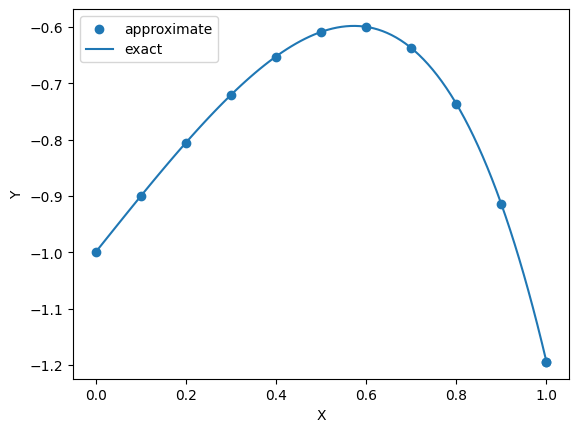

last point error = 8.342863559551716e-05
rmse = 4.244848029729883e-05


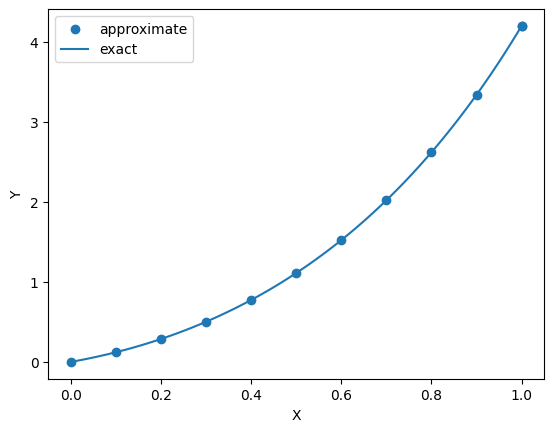

In [4]:
def rk4_system_method(T0, X0, h, getFunc):
    system_length = X0.shape[0]
    K1 = np.zeros(system_length)
    
    # Todo perform the loop operation in more efficient way
    for j in range(0, system_length):
        K1[j] = h * getFunc(j)(T0, X0)

    K2 = np.zeros(system_length)
    for j in range(0, system_length):
        K2[j] = h * getFunc(j)(T0 + h/2, X0 + K1/2)

    K3 = np.zeros(system_length)
    for j in range(0, system_length):
        K3[j] = h * getFunc(j)(T0 + h/2, X0 + K2/2)

    K4 = np.zeros(system_length)
    for j in range(0, system_length):
        K4[j] = h * getFunc(j)(T0 + h, X0 + K3)

    return X0 + (K1 + 2*K2+ 2*K3 + K4)/6
    
def rk4_system_algorithm(t0, X0, tn, h, getFunc):
    system_length = X0.shape[0]
    T = np.zeros(100)
    XX = np.zeros((system_length, 100))
    T[0] = t0
    XX[:, 0] = X0
    
    i = 0
    while T[i] + h < tn:
        T[i+1] = T[i] + h
        XX[:, i+1] = rk4_system_method(T[i], XX[:, i], h, getFunc)
        i = i + 1

    h = tn - T[i]
    T[i+1] = T[i] + h
    XX[:, i+1] = rk4_system_method(T[i], XX[:, i], h, getFunc)
    i = i + 1

    return (T[:i+1], XX[:, :i+1])

def f(t, X):
    return X[0] - X[1] + 2

def g(t, X):
    return -X[0] + X[1] + 4*t 

def getFunc(index):
    if (index == 0):
        return f
    if (index == 1):
        return g


T, XX = rk4_system_algorithm(0, np.array([-1, 0]), 1, .1, getFunc)    


X = XX[0, :]
Y = XX[1, :]

plot_approximate_vs_exact((T, X), lambda x : -0.5*np.exp(2*x) + x**2 + 2*x - 0.5)
plot_approximate_vs_exact((T, Y), lambda x : 0.5*np.exp(2*x) + x**2 - 0.5)


## 2nd generalize implementation

last point error = 8.342863559596125e-05
rmse = 4.244848029751906e-05


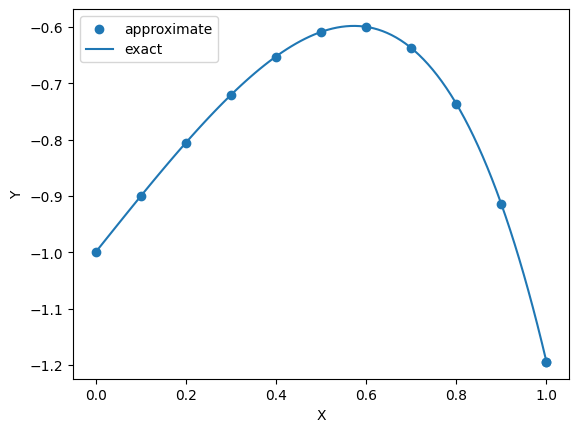

last point error = 8.342863559551716e-05
rmse = 4.244848029729883e-05


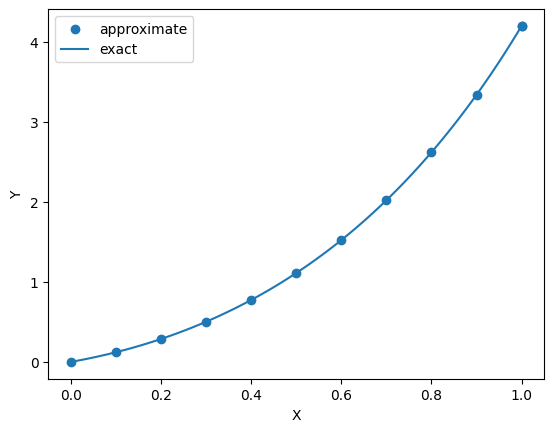

In [5]:
# ode_system_algorithm
def rk4_system_algorithm(t0, X0, tn, h, getFunc, ode_method, tol=100, min_tolerable_dynamic=-1):
    """
        stop algorithm iteration when max slop is less than stop_dynamic
        and stop at tn.
    """
    size = X0.shape[0]
    T = np.array([t0])
    XX = np.array([X0])
    
    i = 0
    max_abs_dynamic = math.inf
    while (T[i] < tn):
        i = i + 1

        Xh, h_prev, h = ode_method(T[i-1], XX[i-1], h, getFunc, tol)
        T = np.append(T, T[i-1]+h_prev)
        XX = np.append(XX, [Xh], axis=0)
        
        # return when slop is close to zero because if the slop is close to zero then 
        # system will not advance. so the current time value can be considered as final
        # time value.
        K = np.zeros(size)
        for j in range(0, size):
            K[j] = h * getFunc(j)(T[i], XX[i])
        max_dynamic = np.max(abs(K))
        if max_dynamic < min_tolerable_dynamic:
            return (T, XX)

    h = tn - T[i-1]
    Xh, h_prev, h = ode_method(T[i-1], XX[i-1], h, getFunc, tol)
    XX[i] = Xh
    T[i] = T[i-1] + h_prev

    return (T, XX)

def rk4_system_method(T0, X0, h, getFunc, tol=100):
    """
        returns (X1, K1) where X1 is value at T0+h, and K1 is slop at T0.
        K1 can be used to controll algorithm iteration
    """
    system_length = X0.shape[0]
    K1 = np.zeros(system_length)
    
    # Todo perform the loop operation in more efficient way
    for j in range(0, system_length):
        K1[j] = h * getFunc(j)(T0, X0)

    K2 = np.zeros(system_length)
    for j in range(0, system_length):
        K2[j] = h * getFunc(j)(T0 + h/2, X0 + K1/2)

    K3 = np.zeros(system_length)
    for j in range(0, system_length):
        K3[j] = h * getFunc(j)(T0 + h/2, X0 + K2/2)

    K4 = np.zeros(system_length)
    for j in range(0, system_length):
        K4[j] = h * getFunc(j)(T0 + h, X0 + K3)
    Xh = X0 + (K1 + 2*K2+ 2*K3 + K4)/6
    return (Xh, h, h)

def test_ode_method(ode_method, step=.2, tol=.1):
    def getFunc(index):
        if (index == 0):
            return lambda t, X: X[0] - X[1] + 2
        if (index == 1):
            return lambda t, X: -X[0] + X[1] + 4*t

    T, XX = rk4_system_algorithm(0, np.array([-1, 0]), 1, step, getFunc, ode_method, tol=tol)    

    X = XX[:, 0]
    Y = XX[:, 1]

    plot_approximate_vs_exact((T, X), lambda x : -0.5*np.exp(2*x) + x**2 + 2*x - 0.5)
    plot_approximate_vs_exact((T, Y), lambda x : 0.5*np.exp(2*x) + x**2 - 0.5)


test_ode_method(ode_method=rk4_system_method, step=.1)

## Embaded system implementation

last point error = 0.005615366034718017
rmse = 0.0026452821353888686


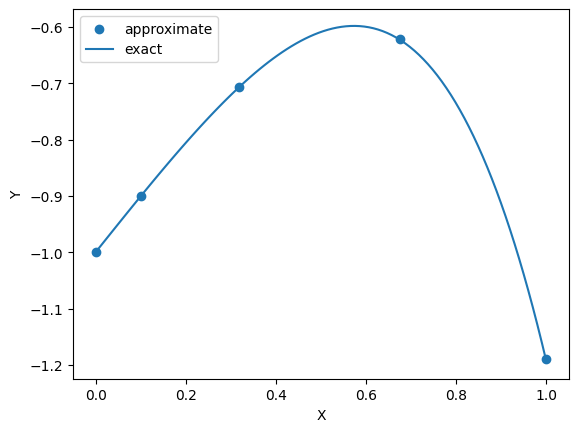

last point error = 0.005615366034718683
rmse = 0.002645282135389168


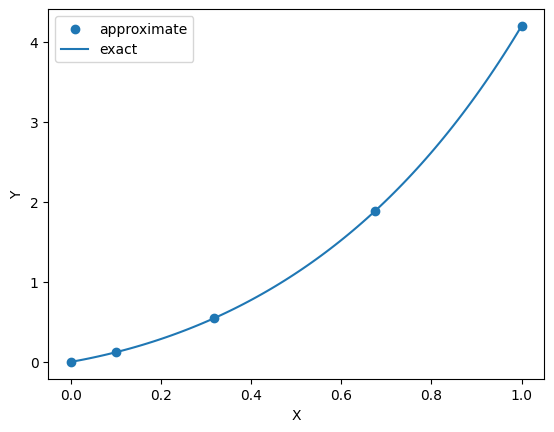

In [6]:
#rkcom
def rkacem_system_method(T0, X0, h, getFunc, tol):
    """
        returns (X1, K1) where X1 is value at T0+h, and K1 is slop at T0.
        K1 can be used to controll algorithm iteration
    """
    size = X0.shape[0]
    while True:
        # Todo perform the loop operation in more efficient way
        K1 = np.zeros(size)
        for j in range(0, size):
            K1[j] = h * getFunc(j)(T0, X0)

        K2 = np.zeros(size)
        for j in range(0, size):
            K2[j] = h * getFunc(j)(T0 + h/2, X0 + K1/2)

        K3 = np.zeros(size)
        for j in range(0, size):
            K3[j] = h * getFunc(j)(T0 + h/2, X0 + K2/2)

        K4 = np.zeros(size)
        for j in range(0, size):
            K4[j] = h * getFunc(j)(T0 + h, X0 + K3)
        XKh = X0 + (K1 + 2*K2+ 2*K3 + K4)/6

        SK1 = K1
        SK2 = K2

        SK3 = np.zeros(size)
        for j in range(0, size):
            SK3[j] = h * getFunc(j)(T0 + h/2, X0 + SK1/24 + (11*SK2)/24)

        SK4 = np.zeros(size)
        for j in range(0, size):
            SK4[j] = h * getFunc(j)(T0 + h/2, X0 + SK1/12 - (25*SK2)/132 + (73*SK3/66))

        XSh = X0 + ((2*h)/9) * ((SK1*SK1+SK1*SK2+SK2*SK2)/(SK1+SK2) + (SK2*SK2+SK2*SK3+SK3*SK3)/(SK2+SK3) + (SK3*SK3+SK3*SK4+SK4*SK4)/(SK3+SK4))

        errest = abs(XKh - XSh)* (281/13824)
        # print(errest)
        delta = .84 * ((tol/errest)**0.25)
        
        #Todo try to make a algorithm without the below line
        min_delta = np.min(delta)
        max_errest = np.max(errest)
        
        h_next = min_delta * h
        if max_errest < tol:
            break
        else:
            h = h_next
            
    return (XKh, h, h_next)


test_ode_method(ode_method=rkacem_system_method, step=.1, tol=.1)